In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import random

In [105]:
df = pd.read_csv('music_features.csv')

In [106]:
print(df.isnull().sum())

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64


In [107]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Label mapping:", label_mapping)

Label mapping: {np.int64(0): 'blues', np.int64(1): 'classical', np.int64(2): 'country', np.int64(3): 'disco', np.int64(4): 'hiphop', np.int64(5): 'jazz', np.int64(6): 'metal', np.int64(7): 'pop', np.int64(8): 'reggae', np.int64(9): 'rock'}


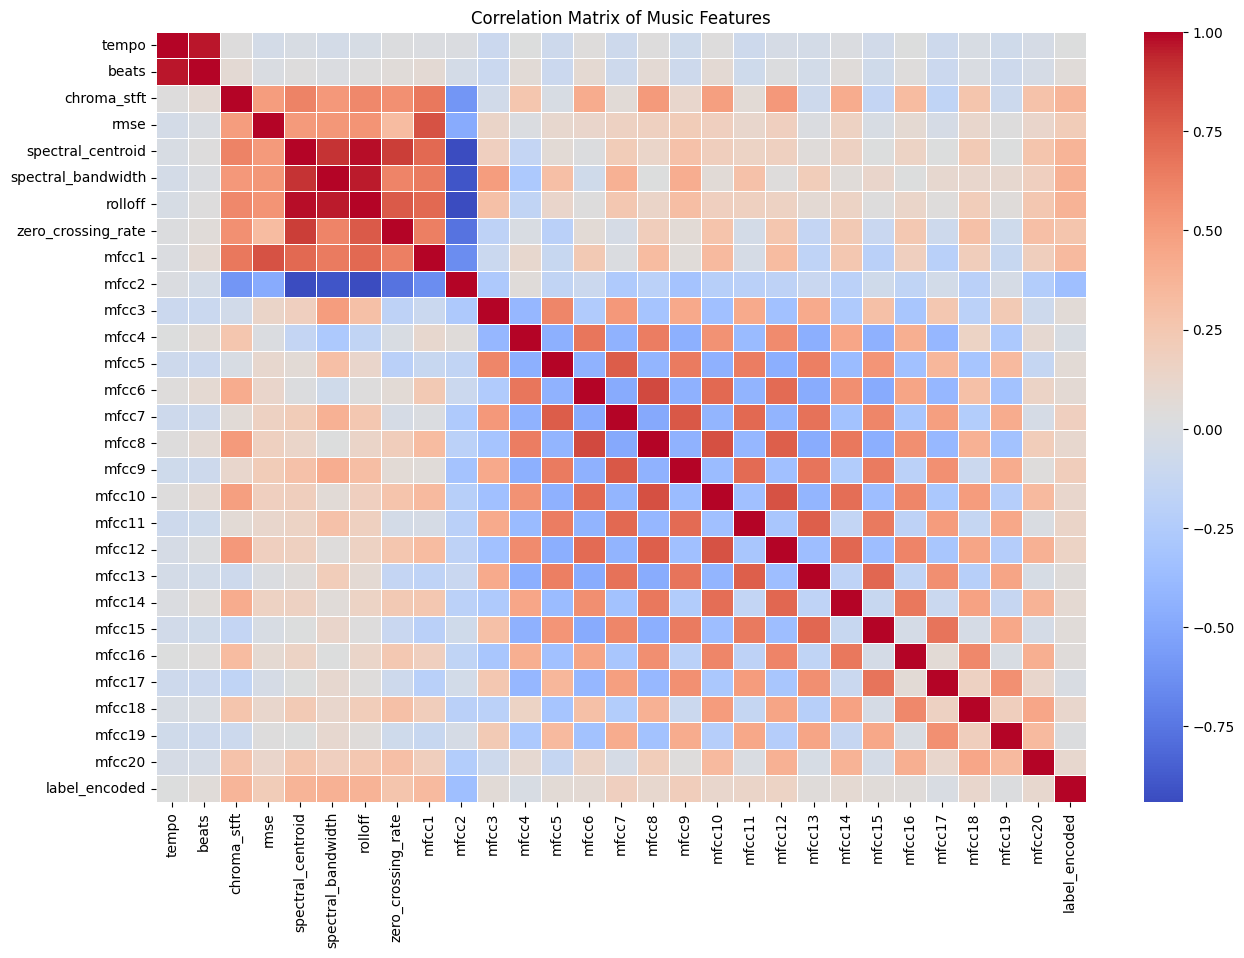

In [108]:
data_for_corr = df.drop(columns=['filename', 'label'])

corr_matrix = data_for_corr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Music Features')
plt.show()

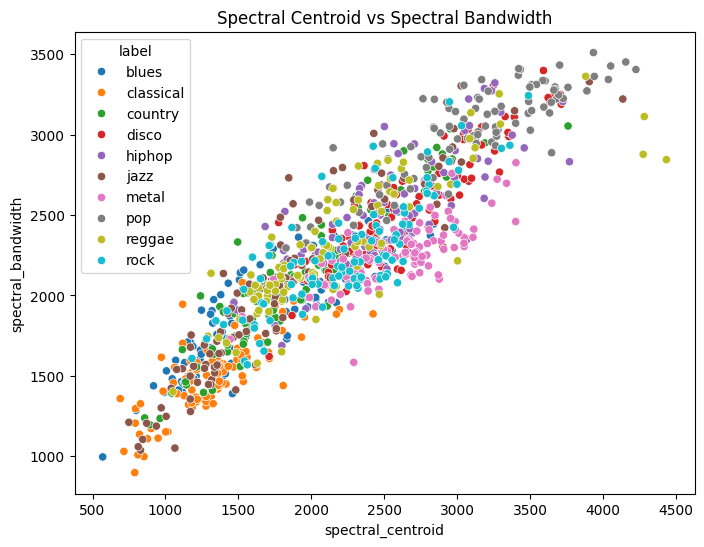

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='spectral_centroid', y='spectral_bandwidth', hue='label')
plt.title('Spectral Centroid vs Spectral Bandwidth')
plt.show()

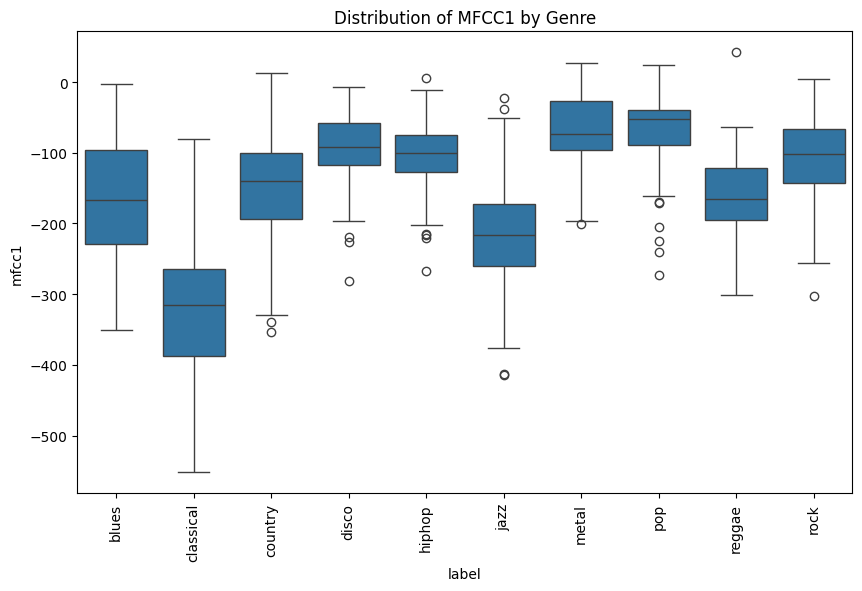

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='mfcc1')
plt.title('Distribution of MFCC1 by Genre')
plt.xticks(rotation=90)
plt.show()

In [112]:
features_to_standardize = [
    'tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 
    'spectral_bandwidth', 'rolloff', 'zero_crossing_rate'
] + [f'mfcc{i}' for i in range(1, 21)]

for feature in features_to_standardize:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

In [113]:
X = df[['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff'] + 
       [f'mfcc{i}' for i in range(1, 21)]]
y = df['label_encoded']

X_train, X_test, y_train, y_test_logistic = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lm = LogisticRegression(class_weight='balanced', multi_class='multinomial', max_iter=1000)
lm.fit(X_train, y_train)

y_pred_logistic = lm.predict(X_test)

print("Logistic Regression Results on Test Set")
p, r, f, s = precision_recall_fscore_support(y_test_logistic, y_pred_logistic, labels=np.unique(y))
for label, genre in label_mapping.items():
    print(f"Genre: {genre}")
    print(f"  Precision: {p[label]:.4f}")
    print(f"  Recall: {r[label]:.4f}")
    print(f"  F-score: {f[label]:.4f}")
    print(f"  Support: {s[label]}")

Logistic Regression Results on Test Set
Genre: blues
  Precision: 0.8000
  Recall: 0.6000
  F-score: 0.6857
  Support: 20
Genre: classical
  Precision: 0.9000
  Recall: 0.9000
  F-score: 0.9000
  Support: 20
Genre: country
  Precision: 0.5882
  Recall: 0.5000
  F-score: 0.5405
  Support: 20
Genre: disco
  Precision: 0.5455
  Recall: 0.6000
  F-score: 0.5714
  Support: 20
Genre: hiphop
  Precision: 0.6087
  Recall: 0.7000
  F-score: 0.6512
  Support: 20
Genre: jazz
  Precision: 0.6667
  Recall: 0.7000
  F-score: 0.6829
  Support: 20
Genre: metal
  Precision: 0.7917
  Recall: 0.9500
  F-score: 0.8636
  Support: 20
Genre: pop
  Precision: 0.7895
  Recall: 0.7500
  F-score: 0.7692
  Support: 20
Genre: reggae
  Precision: 0.5882
  Recall: 0.5000
  F-score: 0.5405
  Support: 20
Genre: rock
  Precision: 0.5455
  Recall: 0.6000
  F-score: 0.5714
  Support: 20


c:\Users\jonah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [114]:
X = df[['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff'] + 
       [f'mfcc{i}' for i in range(1, 21)]]
y = df['label_encoded']

X_train, X_test, y_train, y_test_svm_linear = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = svm.SVC(kernel='linear', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_svm_linear = clf.predict(X_test)

print("SVM - Linear Results on Test Set")
p, r, f, s = precision_recall_fscore_support(y_test_svm_linear, y_pred_svm_linear, labels=np.unique(y))
for label, genre in label_mapping.items():
    print(f"Genre: {genre}")
    print(f"  Precision: {p[label]:.4f}")
    print(f"  Recall: {r[label]:.4f}")
    print(f"  F-score: {f[label]:.4f}")
    print(f"  Support: {s[label]}")

SVM - Linear Results on Test Set
Genre: blues
  Precision: 0.8421
  Recall: 0.8000
  F-score: 0.8205
  Support: 20
Genre: classical
  Precision: 0.8571
  Recall: 0.9000
  F-score: 0.8780
  Support: 20
Genre: country
  Precision: 0.4583
  Recall: 0.5500
  F-score: 0.5000
  Support: 20
Genre: disco
  Precision: 0.5417
  Recall: 0.6500
  F-score: 0.5909
  Support: 20
Genre: hiphop
  Precision: 0.5417
  Recall: 0.6500
  F-score: 0.5909
  Support: 20
Genre: jazz
  Precision: 0.8750
  Recall: 0.7000
  F-score: 0.7778
  Support: 20
Genre: metal
  Precision: 0.8500
  Recall: 0.8500
  F-score: 0.8500
  Support: 20
Genre: pop
  Precision: 0.8235
  Recall: 0.7000
  F-score: 0.7568
  Support: 20
Genre: reggae
  Precision: 0.5294
  Recall: 0.4500
  F-score: 0.4865
  Support: 20
Genre: rock
  Precision: 0.5556
  Recall: 0.5000
  F-score: 0.5263
  Support: 20


In [115]:
X = df[['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff'] + 
       [f'mfcc{i}' for i in range(1, 21)]]
y = df['label_encoded']

X_train, X_test, y_train, y_test_svm_balanced = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = svm.SVC(kernel='rbf', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_svm_balanced = clf.predict(X_test)

print("SVM - RBF Results on Test Set with Balanced Weights:")
p, r, f, s = precision_recall_fscore_support(y_test_svm_balanced, y_pred_svm_balanced, labels=np.unique(y))
for label, genre in label_mapping.items():
    print(f"Genre: {genre}")
    print(f"  Precision: {p[label]:.4f}")
    print(f"  Recall: {r[label]:.4f}")
    print(f"  F-score: {f[label]:.4f}")
    print(f"  Support: {s[label]}")


SVM - RBF Results on Test Set with Balanced Weights:
Genre: blues
  Precision: 0.7895
  Recall: 0.7500
  F-score: 0.7692
  Support: 20
Genre: classical
  Precision: 0.9000
  Recall: 0.9000
  F-score: 0.9000
  Support: 20
Genre: country
  Precision: 0.6087
  Recall: 0.7000
  F-score: 0.6512
  Support: 20
Genre: disco
  Precision: 0.3750
  Recall: 0.6000
  F-score: 0.4615
  Support: 20
Genre: hiphop
  Precision: 0.6500
  Recall: 0.6500
  F-score: 0.6500
  Support: 20
Genre: jazz
  Precision: 0.7647
  Recall: 0.6500
  F-score: 0.7027
  Support: 20
Genre: metal
  Precision: 0.8182
  Recall: 0.9000
  F-score: 0.8571
  Support: 20
Genre: pop
  Precision: 0.8889
  Recall: 0.8000
  F-score: 0.8421
  Support: 20
Genre: reggae
  Precision: 0.7333
  Recall: 0.5500
  F-score: 0.6286
  Support: 20
Genre: rock
  Precision: 0.4286
  Recall: 0.3000
  F-score: 0.3529
  Support: 20


In [116]:
X = df[['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff'] + 
       [f'mfcc{i}' for i in range(1, 21)]]
y = df['label_encoded']

custom_weights = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2}

X_train, X_test, y_train, y_test_svm_rbf = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = svm.SVC(kernel='rbf', class_weight=custom_weights)
clf.fit(X_train, y_train)

y_pred_svm_rbf = clf.predict(X_test)

print("SVM - RBF Results on Test Set with Custom Weights:")
p, r, f, s = precision_recall_fscore_support(y_test_svm_rbf, y_pred_svm_rbf, labels=np.unique(y))
label_mapping = {0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
for label, genre in label_mapping.items():
    print(f"Genre: {genre}")
    print(f"  Precision: {p[label]:.4f}")
    print(f"  Recall: {r[label]:.4f}")
    print(f"  F-score: {f[label]:.4f}")
    print(f"  Support: {s[label]}")

SVM - RBF Results on Test Set with Custom Weights:
Genre: blues
  Precision: 0.8750
  Recall: 0.7000
  F-score: 0.7778
  Support: 20
Genre: classical
  Precision: 0.9000
  Recall: 0.9000
  F-score: 0.9000
  Support: 20
Genre: country
  Precision: 0.6667
  Recall: 0.6000
  F-score: 0.6316
  Support: 20
Genre: disco
  Precision: 0.4783
  Recall: 0.5500
  F-score: 0.5116
  Support: 20
Genre: hiphop
  Precision: 0.6875
  Recall: 0.5500
  F-score: 0.6111
  Support: 20
Genre: jazz
  Precision: 0.7333
  Recall: 0.5500
  F-score: 0.6286
  Support: 20
Genre: metal
  Precision: 0.8571
  Recall: 0.9000
  F-score: 0.8780
  Support: 20
Genre: pop
  Precision: 0.9412
  Recall: 0.8000
  F-score: 0.8649
  Support: 20
Genre: reggae
  Precision: 0.6364
  Recall: 0.7000
  F-score: 0.6667
  Support: 20
Genre: rock
  Precision: 0.4375
  Recall: 0.7000
  F-score: 0.5385
  Support: 20


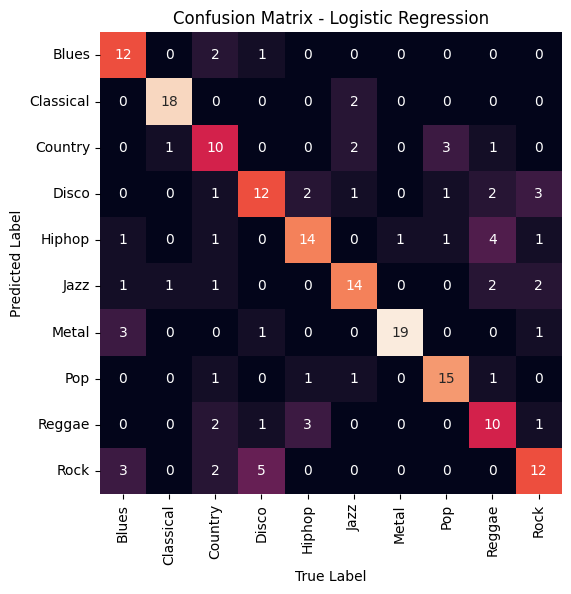

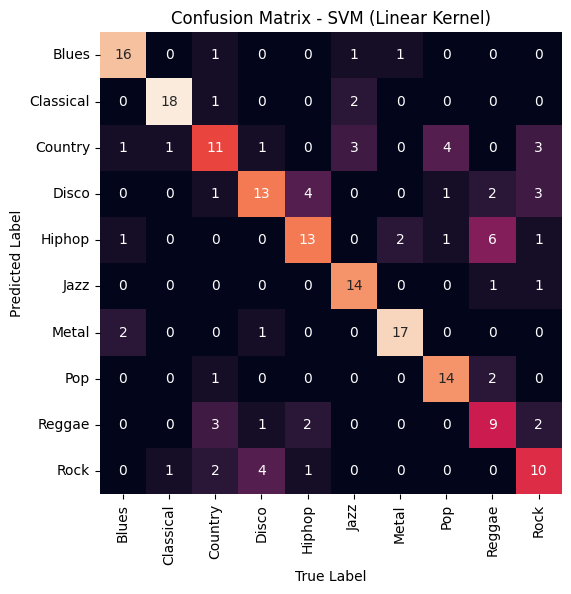

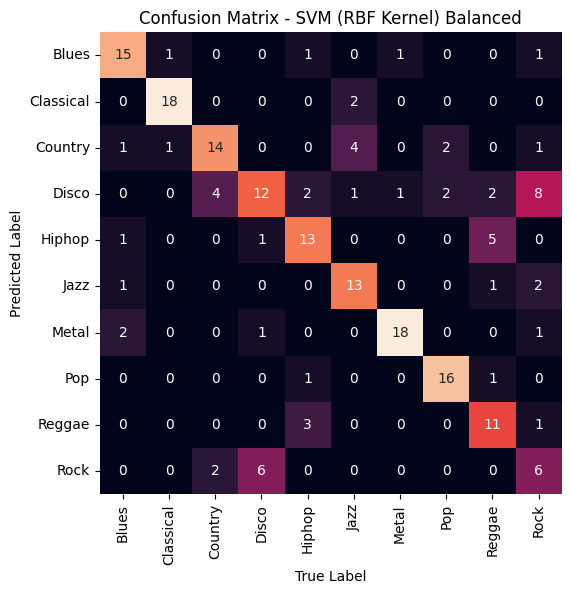

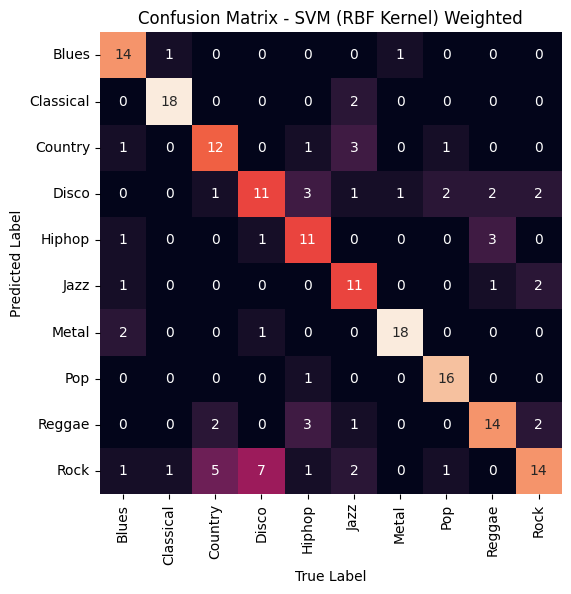

In [117]:
target_names = ['Blues', 'Classical', 'Country', 'Disco', 'Hiphop', 'Jazz', 
                'Metal', 'Pop', 'Reggae', 'Rock']

mat_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
mat_svm_linear = confusion_matrix(y_test_svm_linear, y_pred_svm_linear)
mat_svm_rbf_balanced = confusion_matrix(y_test_svm_balanced, y_pred_svm_balanced)
mat_svm_rbf = confusion_matrix(y_test_svm_rbf, y_pred_svm_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(mat_logistic.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(mat_svm_linear.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix - SVM (Linear Kernel)')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(mat_svm_rbf_balanced.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix - SVM (RBF Kernel) Balanced')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(mat_svm_rbf.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix - SVM (RBF Kernel) Weighted')
plt.show()